In [1]:
import pandas as pd
import csv

import sys
sys.path.insert(0, '../')

import seaborn as sns
import matplotlib.pyplot as plt

import collections
from collections import defaultdict

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Import data, it is divided into train, test and dev set.

In [2]:
col_names=['genre', 'file', 'year', 'feature_1','feature_2', 'sentence_1', 'sentence_2', 'feature_3','feature_4']

df_train=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-train.xls', header=None, names=col_names)
df_train["sent1_length"]= df_train["sentence_1"].str.len()
df_train["sent2_length"]= df_train["sentence_2"].str.len()

df_test=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-test.xls', header=None, names=col_names)
df_test["sent1_length"]= df_test["sentence_1"].str.len()
df_test["sent2_length"]= df_test["sentence_2"].str.len()

df_dev=pd.read_excel('/Users/mariabrullmartinez/Documents/TFM-NLP/EDA/stsbenchmark/sts-dev.xls', header=None, names=col_names)
df_dev["sent1_length"]= df_dev["sentence_1"].str.len()
df_dev["sent2_length"]= df_dev["sentence_2"].str.len()

df=pd.concat([df_train, df_test, df_dev])

### Analyze the size of each set

In [3]:
print ('The lenght of the train dataset is :', df_train.shape)
print ('The lenght of the test dataset is :', df_test.shape)
print ('The lenght of the dev dataset is :', df_dev.shape)
print ('The lenght of the total dataset is :', df.shape)

The lenght of the train dataset is : (5749, 11)
The lenght of the test dataset is : (1379, 11)
The lenght of the dev dataset is : (1500, 11)
The lenght of the total dataset is : (8628, 11)


### Groupby each different genre to understand the type of sentences.

In [4]:
df.groupby('genre').size().sort_values(ascending=False)

genre
main-news        4299
main-captions    3250
main-forums       629
main-forum        450
dtype: int64

In [5]:
df.groupby('genre')['sent1_length'].mean().sort_values(ascending=False)

genre
main-news        72.258897
main-forums      67.693164
main-forum       45.904444
main-captions    39.370154
Name: sent1_length, dtype: float64

### Obtain the length of the sentences.

In [6]:
def hist_length(df):
    
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x='sent1_length', hue='genre')
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x='sent2_length', hue='genre')
    
    print('\n Average lenght of sentences_1 :', df["sent1_length"].mean(), '\n' )
    print('Average length of sentences_1 per genre: \n',  df.groupby('genre')['sent1_length'].mean().sort_values(ascending=False), '\n')
    
    print('\n Average lenght of sentences_2 :', df["sent2_length"].mean(), '\n')
    print('Average length of sentences_2 per genre: \n',  df.groupby('genre')['sent2_length'].mean().sort_values(ascending=False))
    
    


 Average lenght of sentences_1 : 57.6397634371195 

Average length of sentences_1 per genre: 
 genre
main-news        70.575629
main-forum       45.904444
main-captions    38.942500
Name: sent1_length, dtype: float64 


 Average lenght of sentences_2 : 57.38344417220861 

Average length of sentences_2 per genre: 
 genre
main-news        70.212473
main-forum       45.839729
main-captions    38.958500
Name: sent2_length, dtype: float64


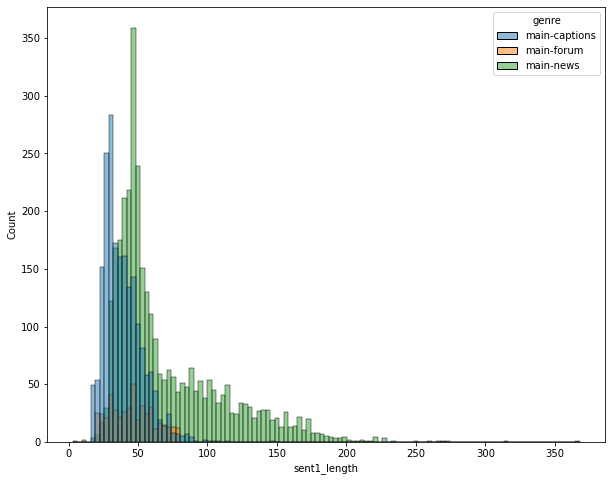

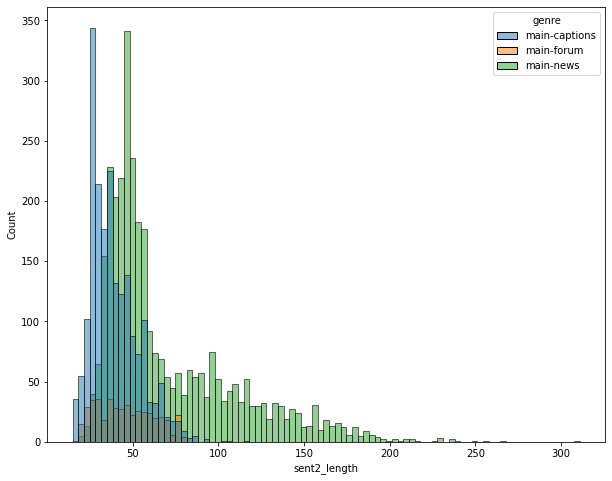

In [7]:
hist_length(df_train)

### Frequency of words and stop words

In [8]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def stop_words_normal_words(df, sentence):
    corpus=[]

    sentences= df[sentence].str.split()
    words=sentences.values.tolist()
    corpus=[word for i in words for word in i]

    dict_stop_word_count=defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dict_stop_word_count[word]+=1 
            
    stop_words_list=list(dict_stop_word_count.keys())
    count_stop_words_list=list(dict_stop_word_count.values())
    
    plt.figure(figsize=(25,20))         
    sns.barplot( count_stop_words_list, stop_words_list).set_title('Stop words frequency')
    
    print('The total length of our vocab is:', len(stop_words_list))
    
    ##stop_words
    counter=collections.Counter(corpus)
    most_common_words=counter.most_common()
    
    word_list=[]
    count_word_list = []
    
    for word,count in most_common_words[:150]:
        if (word not in stop_words):
            word_list.append(word)
            count_word_list.append(count)
        
    plt.figure(figsize=(20,18))        
    sns.barplot( count_word_list, word_list).set_title('Words frequency')
    
    print('The total sum of stop words is:', len(word_list))

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The total length of our vocab is: 131


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The total sum of stop words is: 94


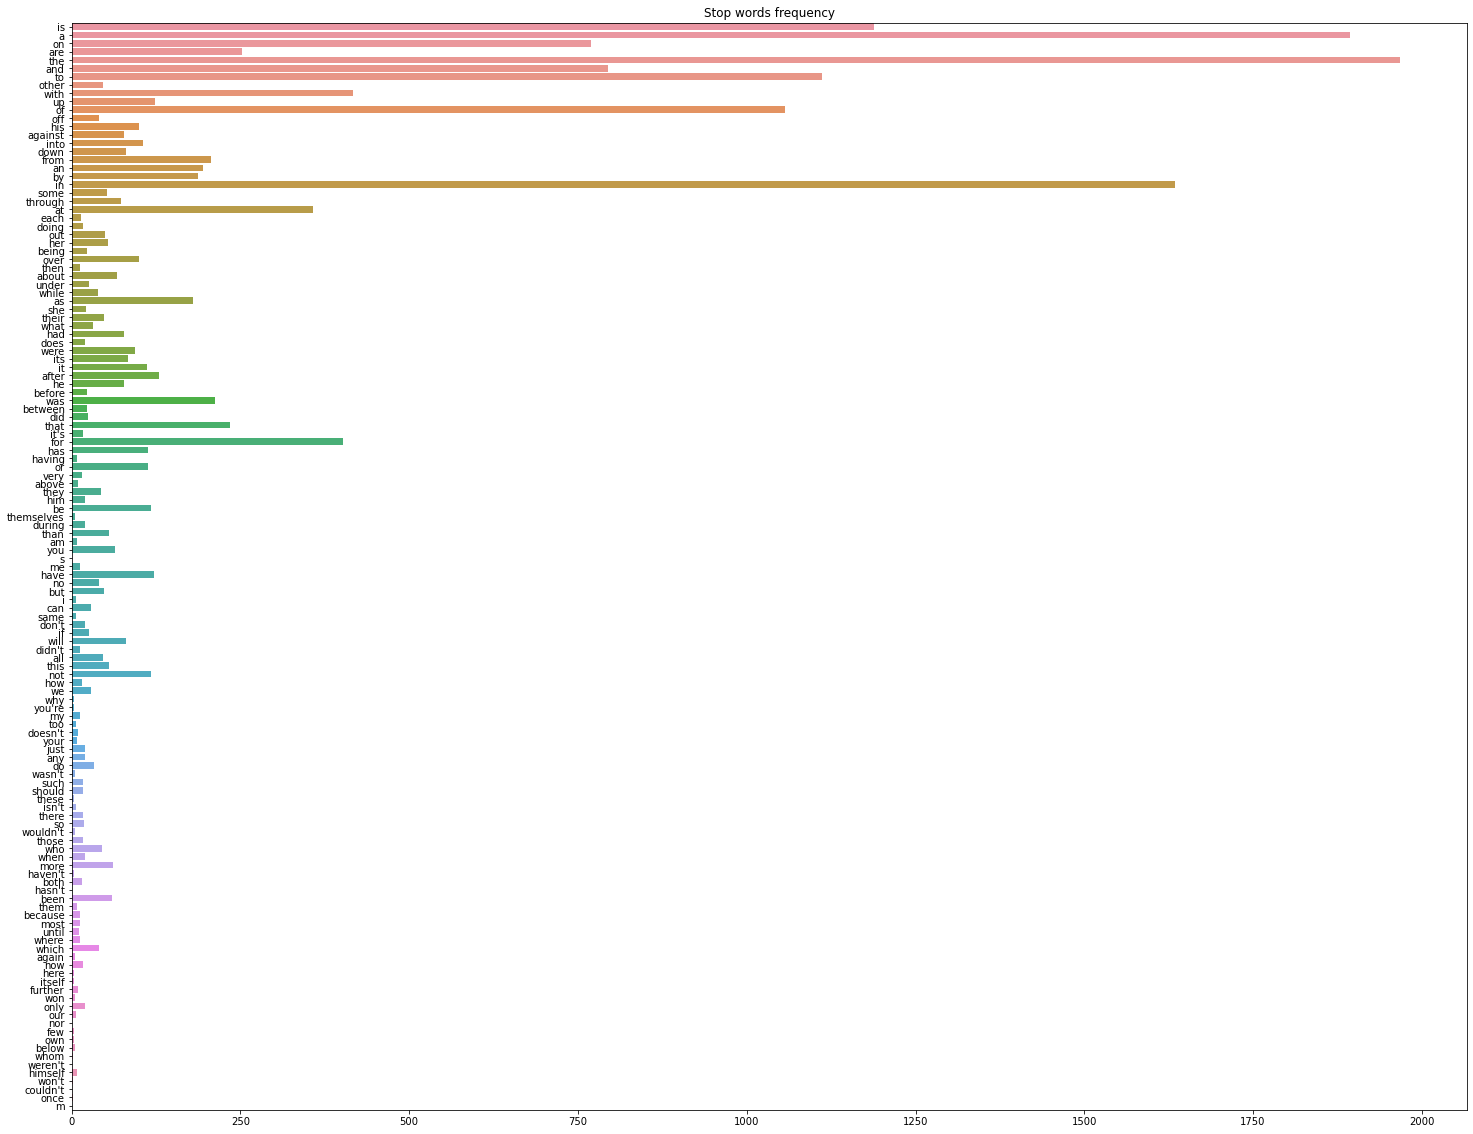

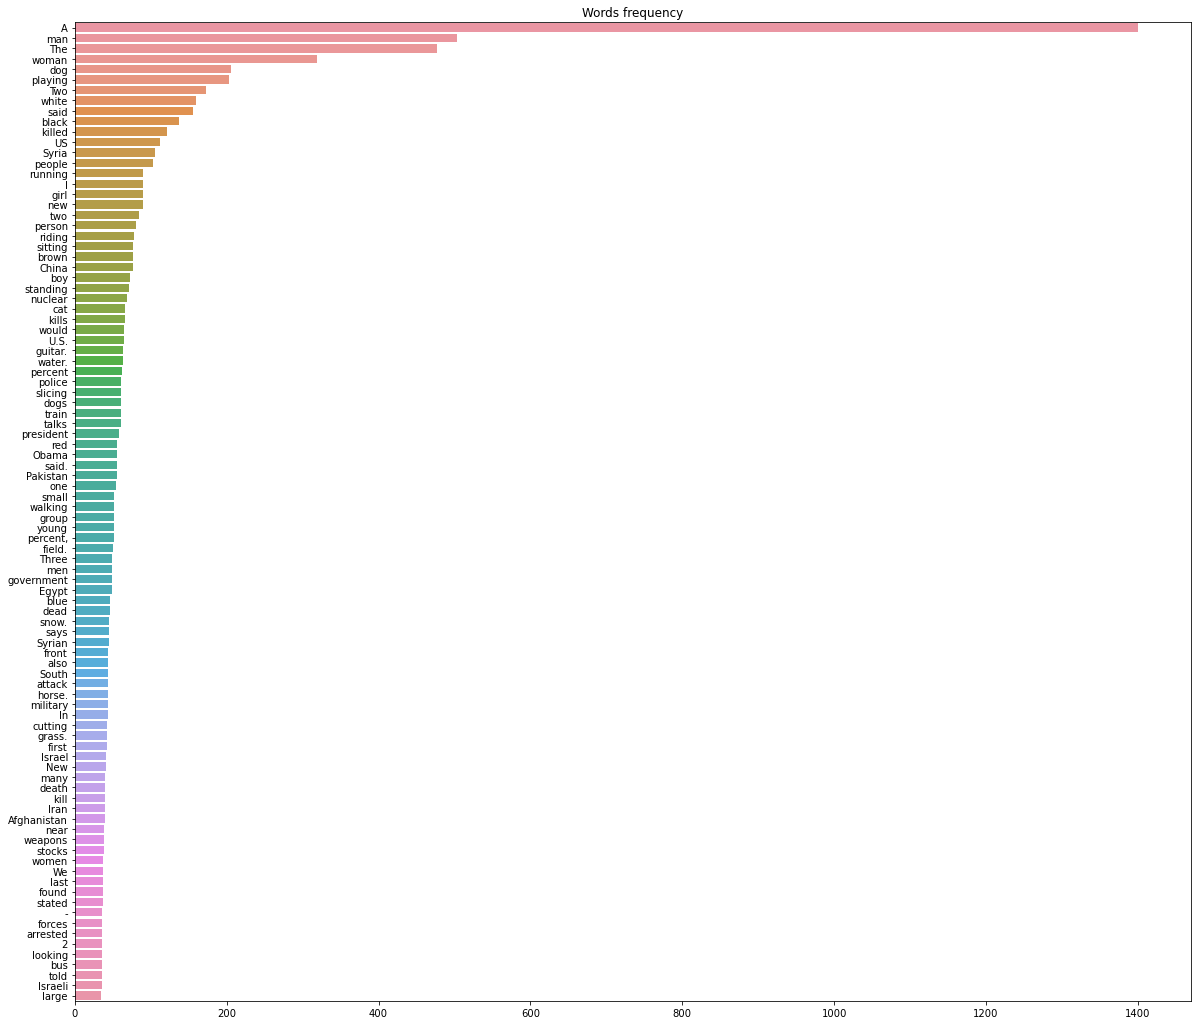

In [10]:
stop_words_normal_words(df_train, 'sentence_1')

### N-gram exploration

In [11]:
def get_top_pair_words(data, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    plt.figure(figsize=(20,18))  
    word,count=map(list,zip(*words_freq[0:20]))
    g=sns.barplot(count, word).set_title('Two pair words frequency')
   
    


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


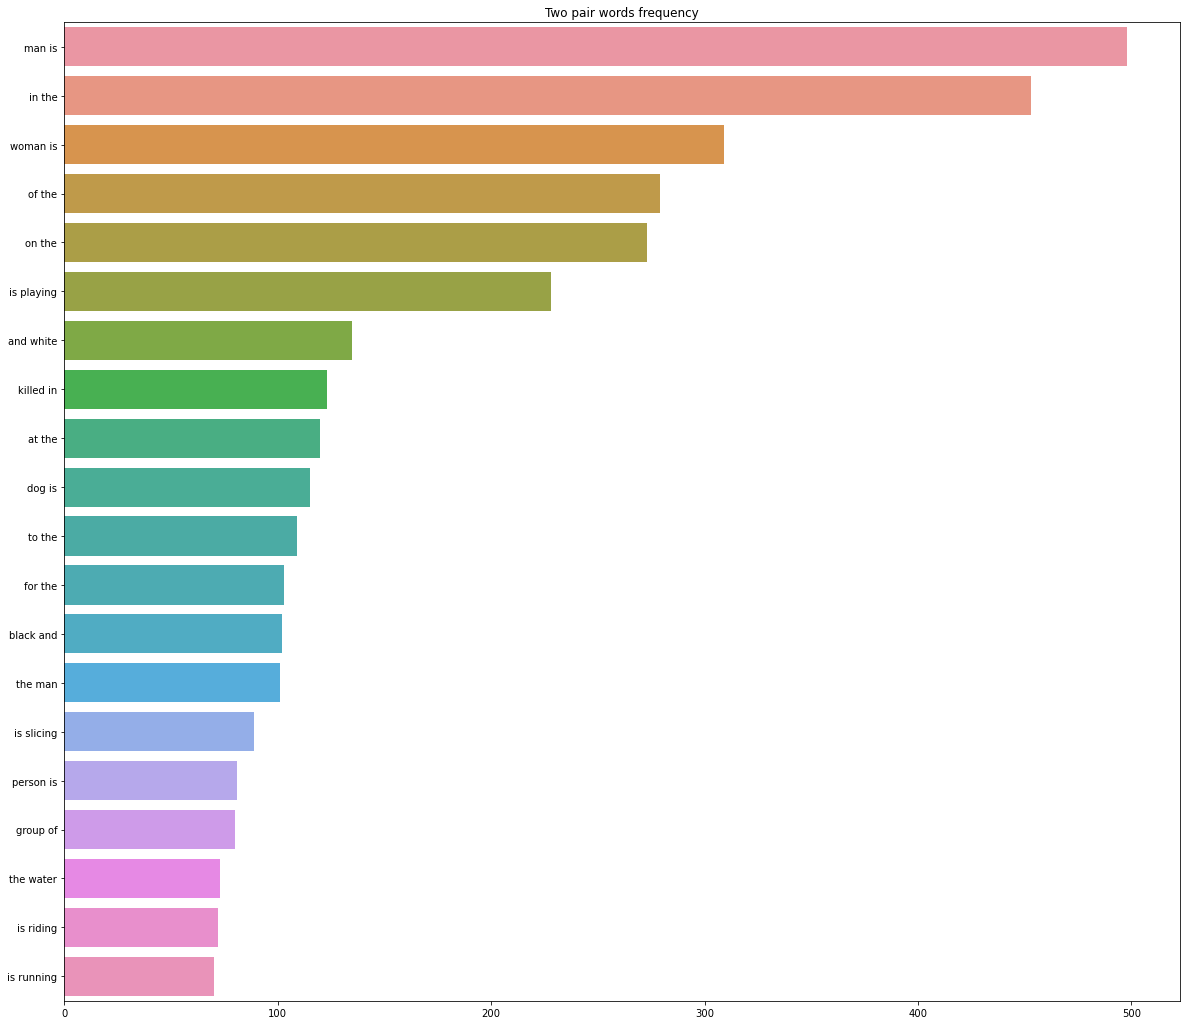

In [12]:
get_top_pair_words(df['sentence_1'], 2)


### Word cloud

In [15]:
def get_word_cloud(data):
    stop_words = nltk.corpus.stopwords.words("english")
    
    word_cloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    word_cloud=word_cloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(word_cloud)
    plt.show()


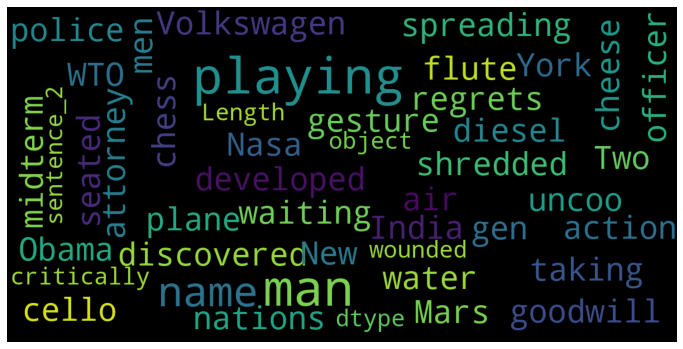

In [16]:
get_word_cloud(df['sentence_2'])

In [17]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariabrullmartinez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
def get_text(df):
    text=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    
    for sentence in df['sentence_1']:
        words=[w for w in word_tokenize(sentence) if (w not in stop_words)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        text.append(words)
        
    return text


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
text=preprocess_news(df)


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
dict_text_gensim=gensim.corpora.Dictionary(text)
bow_corpus = [dict_text_gensim.doc2bow(list_words) for list_words in text]

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
bow_corpus

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1)],
 [(4, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(5, 1), (10, 1), (11, 1), (12, 1)],
 [(4, 1), (5, 1), (13, 1)],
 [(12, 1), (14, 1), (15, 1)],
 [(4, 1), (16, 1)],
 [(4, 1), (5, 1), (17, 1), (18, 1)],
 [(4, 1), (5, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1)],
 [(4, 2), (17, 1), (25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(2, 1), (4, 1), (5, 1)],
 [(23, 1), (32, 1), (33, 1), (34, 1)],
 [(4, 1), (35, 1), (36, 1)],
 [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1)],
 [(17, 1), (42, 1), (43, 1), (44, 1), (45, 1)],
 [(31, 1), (46, 1)],
 [(21, 1), (27, 1), (47, 1), (48, 1)],
 [(4, 1), (17, 1), (49, 1), (50, 1)],
 [(4, 1), (51, 1), (52, 1), (53, 1)],
 [(4, 1), (5, 1), (19, 1)],
 [(44, 1), (54, 1), (55, 1)],
 [(31, 1), (56, 1), (57, 1)],
 [(31, 1), (58, 1), (59, 1)],
 [(17, 1), (60, 1), (61, 1), (62, 1)],
 [(2, 1), (5, 1), (17, 1), (31, 1)],
 [(36, 1), (63, 1), (64, 1)],
 [(17, 1), (31, 1), (65, 1), (66, 1),

In [35]:
print(dic)

Dictionary(12782 unique tokens: ['plane', 'taking', 'flute', 'large', 'man']...)


/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 9, 
                                   id2word = dict_text_gensim,
                                   workers = 2)
lda_model.show_topics()

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.007*"The" + 0.007*"Syria" + 0.007*"n\'t" + 0.005*"woman" + 0.004*"cat" + 0.004*"baby" + 0.004*"Two" + 0.003*"men" + 0.003*"man" + 0.003*"attack"'),
 (1,
  '0.026*"man" + 0.016*"The" + 0.010*"said" + 0.010*"woman" + 0.005*"playing" + 0.005*"dog" + 0.004*"person" + 0.003*"cutting" + 0.003*"percent" + 0.003*"black"'),
 (2,
  '0.008*"The" + 0.005*"man" + 0.004*"said" + 0.004*"woman" + 0.004*"person" + 0.003*"girl" + 0.003*"two" + 0.003*"Obama" + 0.003*"Syria" + 0.003*"people"'),
 (3,
  '0.009*"woman" + 0.008*"The" + 0.007*"Egypt" + 0.006*"percent" + 0.004*"said" + 0.003*"killed" + 0.003*"cat" + 0.003*"say" + 0.003*"share" + 0.003*"year"'),
 (4,
  '0.016*"man" + 0.015*"dog" + 0.015*"Two" + 0.008*"playing" + 0.007*"woman" + 0.007*"killed" + 0.005*"said" + 0.004*"say" + 0.004*"China" + 0.004*"snow"'),
 (5,
  '0.026*"man" + 0.025*"The" + 0.014*"woman" + 0.013*"dog" + 0.009*"playing" + 0.008*"white" + 0.008*"black" + 0.006*"running" + 0.006*"guitar" + 0.005*"said"'),
 (6,
  '0.016*"Th

In [24]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
vis = gensimvis.prepare(lda_model, bow_corpus, dict_text_gensim)
vis

/Users/mariabrullmartinez/opt/anaconda3/envs/nlp-eda/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.075816 -0.008759       1        1  18.106409
1     -0.055616  0.043573       2        1  11.461511
4     -0.064167 -0.065170       3        1  10.851819
7      0.013071  0.048042       4        1  10.743135
8     -0.026517 -0.054157       5        1  10.643310
6      0.007680  0.030601       6        1  10.411508
2      0.034204  0.090575       7        1   9.897794
0      0.098683 -0.066847       8        1   9.432621
3      0.068477 -0.017858       9        1   8.451892, topic_info=         Term        Freq       Total Category  logprob  loglift
4         man  678.000000  678.000000  Default  30.0000  30.0000
39        dog  358.000000  358.000000  Default  29.0000  29.0000
145       Two  219.000000  219.000000  Default  28.0000  28.0000
17        The  677.000000  677.000000  Default  27.0000  27.0000
50     riding   93.000000   93.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
5     playing   11.616287  280.591386   Topic9  -6.0027  -0.7137
4         man   10.796347  678.318876   Topic9  -6.0759  -1.6696
2188     case    7.622057   47.350996   Topic9  -6.4240   0.6442
352       one    7.804020   88.782556   Topic9  -6.4004   0.0392
1752    would    7.730043   86.289044   Topic9  -6.4100   0.0582

[744 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
8174      2  0.782745  'Whitey
7577      7  0.845664    'Wins
8538      4  0.794637   'final
1948      9  0.888893    -Not-
3639      1  0.141237     .DJI
...     ...       ...      ...
248       6  0.091774    young
248       7  0.039332    young
248       9  0.091774    young
356       3  0.812761    zebra
8141      8  0.881995      ‚Äù

[2124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 5, 8, 9, 7, 3, 1, 4])